# Fall 2022 Data Science Intern Challenge (Qasim Iqbal)

In [ ]:
# Necessary imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime

# required on Jupiter Notebook
%matplotlib inline


width, height = 15, 6 # display images dimensions|
plt.rcParams['figure.figsize'] = [width, height]

You can use table of contents on the left to navigate for solutions to each question

## Reading Data in

In [ ]:
# data source provided in challenge
sheet_url = "https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0"
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

# read in through URL of google sheet
shops_df = pd.read_csv(url)

# show top records from the dataframe
shops_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
# check if there are null or empty records in any column
for c in shops_df.columns:
    print(c," : ", shops_df[c].isna().sum()) # get count of NA records and sum them

order_id  :  0
shop_id  :  0
user_id  :  0
order_amount  :  0
total_items  :  0
payment_method  :  0
created_at  :  0


In [ ]:
shops_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


## Question 1: Given some sample data, write a program to answer the following: 

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


### 1a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

Solution: I don't think mean is the right metric to be used here as a few anomaly records can heavily affect the total AOV (Avergae Order Value). I think a better metric would be the one which does not get much affected by extreme outliers.

As we can see in the analysis below, Shop Id 42 and 78 are outliers as the median order amount is $284 where as both of these shops have total order amounts in millions. User_id 607 and 823 have bought most of the expensive shoes heavily skewing the mean average. 

### Analysis

[]

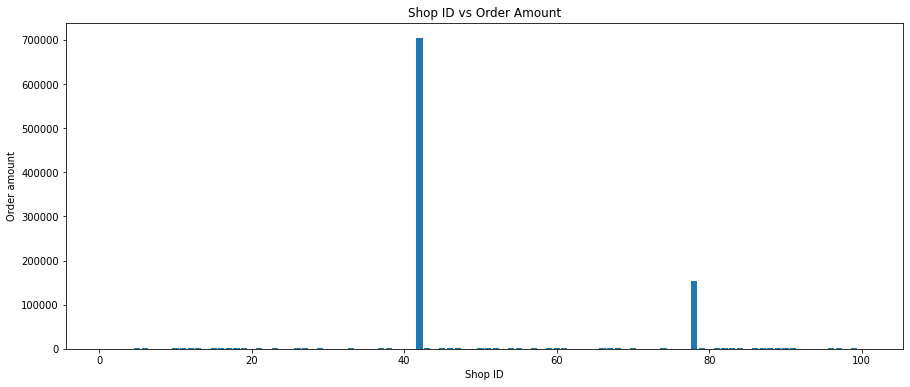

In [ ]:
# check visually what order amounts look like for each shop
plt.title("Shop ID vs Order Amount")
plt.xlabel("Shop ID")
plt.ylabel("Order amount")
plt.bar(shops_df['shop_id'], shops_df['order_amount'])
plt.plot()

In bar plot above we can see that, there are two anomaly records shop_id 42 and 78.
These two shops can make the total average way off, as the average is the sum of all order amounts by each shop and then divided by the total number of shops.
These anomaly records can be an error in typing or just very expensive shoes.

In [ ]:
# groupby shop id and sort by order amount to see which shop has the highest order amount
shops_df.groupby('shop_id').sum().sort_values(by="order_amount", ascending=False)

,order_id,user_id,order_amount,total_items
shop_id,,,,
42,124538,38688,11990176,34063
78,122499,39916,2263800,88
89,172859,50618,23128,118
81,158452,49317,22656,128
6,143483,49818,22627,121
...,...,...,...,...
2,126448,47370,9588,102
100,94261,34093,8547,77
56,91134,31211,8073,69


In [ ]:
shops_df.query('shop_id in [42, 78]')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
...,...,...,...,...,...,...,...
4745,4746,42,872,352,1,debit,2017-03-24 0:57:24
4767,4768,42,720,704,2,credit_card,2017-03-14 10:26:08
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


In [ ]:
shops_df.query('user_id == 823')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
54,55,79,823,181,1,cash,2017-03-25 4:47:17
181,182,20,823,127,1,cash,2017-03-03 16:29:13
524,525,8,823,396,3,cash,2017-03-26 17:16:10
1235,1236,25,823,130,1,debit,2017-03-28 5:12:57
1959,1960,44,823,432,3,debit,2017-03-29 6:25:06
2162,2163,40,823,161,1,credit_card,2017-03-26 16:17:30
2238,2239,71,823,164,1,debit,2017-03-27 22:17:10
2397,2398,69,823,524,4,debit,2017-03-02 3:47:32
2583,2584,12,823,201,1,credit_card,2017-03-11 10:25:39
2651,2652,49,823,258,2,credit_card,2017-03-25 13:05:03


### 1b. What metric would you report for this dataset?

 I think median is the better choice for this dataset as it is a measure of central tendency for skewed distribution and is better at dealing with extreme outlier records.

### 1c. What is its value?

Its value is $284.00

In [ ]:
# get the median of the order amounts
shops_df['order_amount'].median()

284.0

## Question 2: Please use queries to answer the following questions.

### 2a. How many orders were shipped by Speedy Express in total?

Solution: 54

In [ ]:
# SELECT COUNT(Orders.OrderID) AS CountOfOrders
# FROM Orders
# LEFT JOIN Shippers on Orders.ShipperID = Shippers.ShipperID
# WHERE Shippers.ShipperName = 'Speedy Express'

# answer -> 54

### 2b. What is the last name of the employee with the most orders?

Solution: Peacock

In [ ]:
# SELECT LastName, MAX(NumberOfOrders)
# FROM (SELECT Employees.LastName, COUNT(Orders.OrderID) as NumberOfOrders FROM [Orders] 
# INNER JOIN Employees ON Employees.EmployeeID = Orders.EmployeeID
# GROUP BY Employees.EmployeeID) p

# answer -> Peacock

### 2c. What product was ordered the most by customers in Germany?

Solution: Gorgonzola Telino

In [ ]:
# SELECT ProductName, MAX(CountOfProducts) AS MostBoughtProduct
# FROM 
# (
#     SELECT Products.ProductName, COUNT(Products.ProductID) AS CountOfProducts
#     FROM Customers
#     INNER JOIN Orders on Orders.CustomerID = Customers.CustomerID
#     INNER JOIN OrderDetails on OrderDetails.OrderID = Orders.OrderID
#     INNER JOIN Products on OrderDetails.ProductID = Products.ProductID
#     WHERE Customers.Country = 'Germany' 
#     GROUP BY Products.ProductID
# )

# answer -> Gorgonzola Telino